# Определение наилучших порогов классификации

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import torch

import os
import sys
from ast import literal_eval

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

sys.path.append('C:\\Users\\andre\\PycharmProjects\\AdClassificationProject')
import src

In [2]:
model_path = '../models/nnets/nnet_train.pt'
data_folder_path = '../data/processed/test'

Загрузка модели:

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
with open(model_path, 'rb') as file:
    clf = torch.load(file, map_location=device)

Функция, строящая показатели precision, recall, F-score в зависимости от порогового значения, а также precision-recall кривую.

In [4]:
def analyse_thresholds(label):
    df = pd.read_csv(os.path.join(data_folder_path, label + '.csv'))
    df['texts'] = df['texts'].apply(literal_eval)
    
    res = clf.predict_probas(list(df['texts']))
    probas = res[label][:, 1]
    
    p, r, thresholds = precision_recall_curve(df['labels'], probas)
    t = np.concatenate((thresholds, np.array([1])))

    plt.figure()
    plt.plot(p, r)
    plt.grid()
    plt.xlabel('Precision')
    plt.ylabel('Recall')

    plt.figure()
    plt.plot(t, 2 * p * r / (p + r + 0.001))
    plt.grid()
    plt.xlabel('Threshold')
    plt.ylabel('F-score')
    
    plt.figure()
    plt.plot(t, p)
    plt.grid()
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
               
    plt.figure()
    plt.plot(t, r)
    plt.grid()
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    
    t = thresholds[np.argmax( 2 * p * r / (p + r + 0.001))]
    print(f't = {t}')

# Nationality

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:572: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


t = 0.7494738698005676


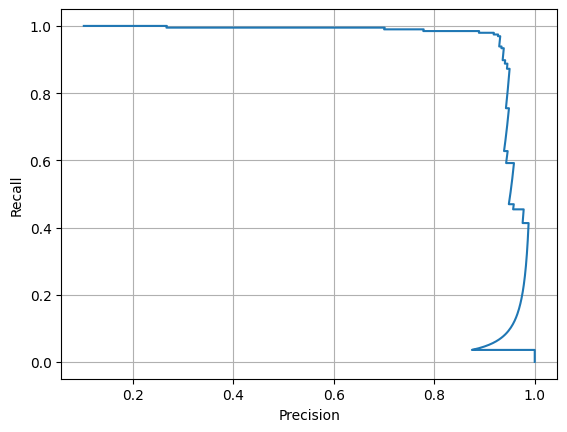

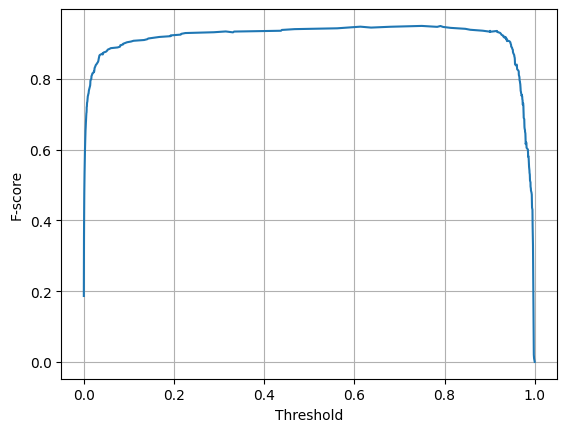

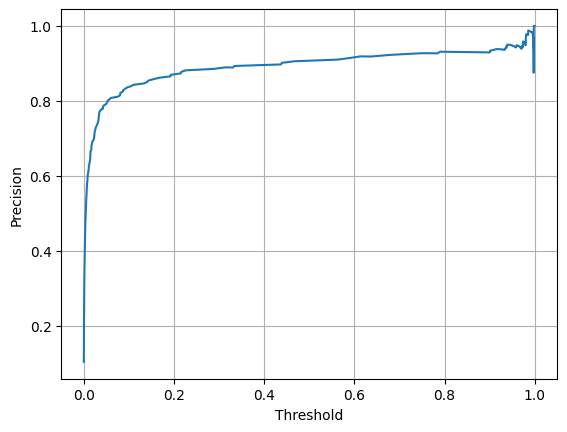

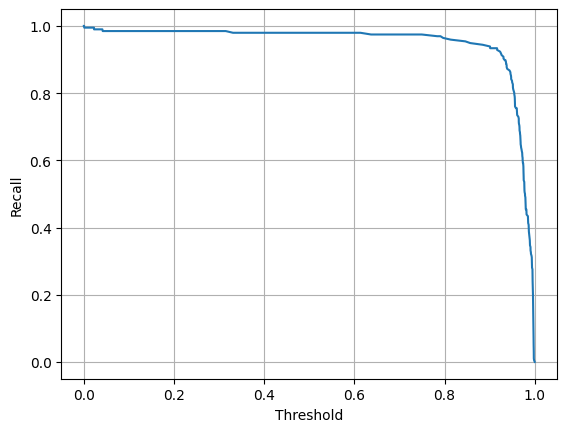

In [5]:
analyse_thresholds('nationality')

Величина порога $t$ выбирается таким образом, чтобы достигалось максимальное значение величины $F(t)$, т.е., $t = 0.75$.

# Families

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:572: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


t = 0.18747757375240326


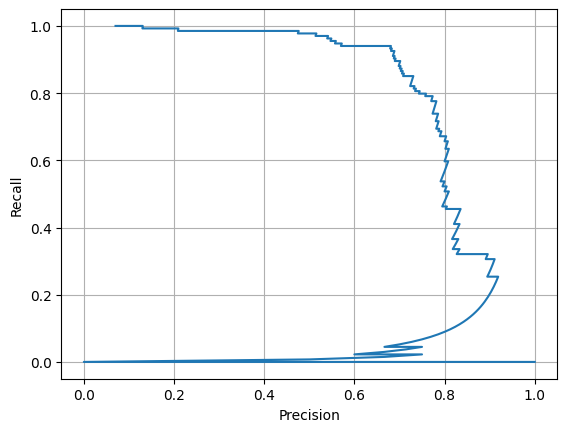

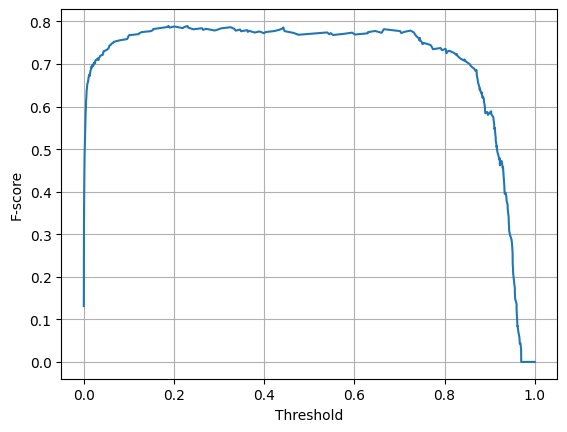

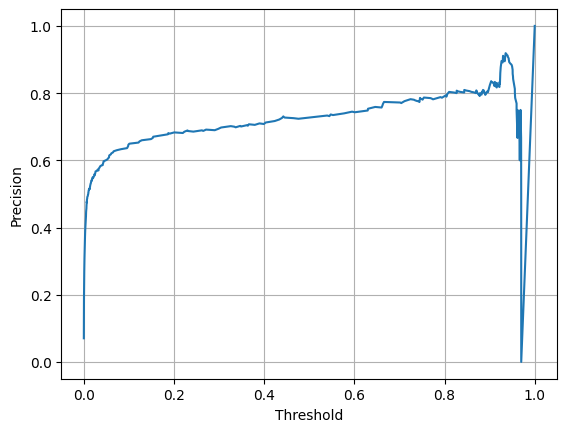

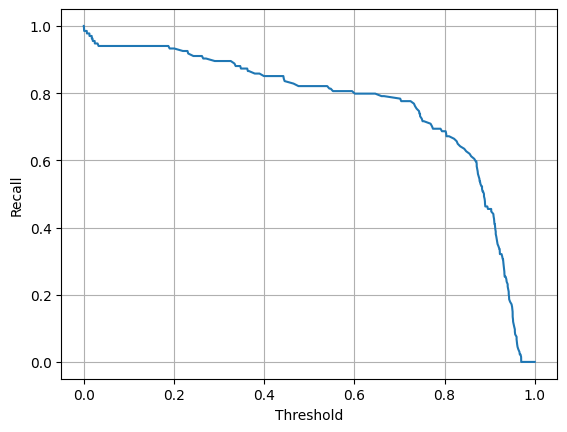

In [5]:
analyse_thresholds('families')

Пороговое значение было выбрано равным $t = 0.7$ для обеспечения большего показателя precision (при $t = 0.7$ $precision \approx 0.8$ и $recall \approx 0.8$)

# Sex

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:572: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


t = 0.2543890178203583


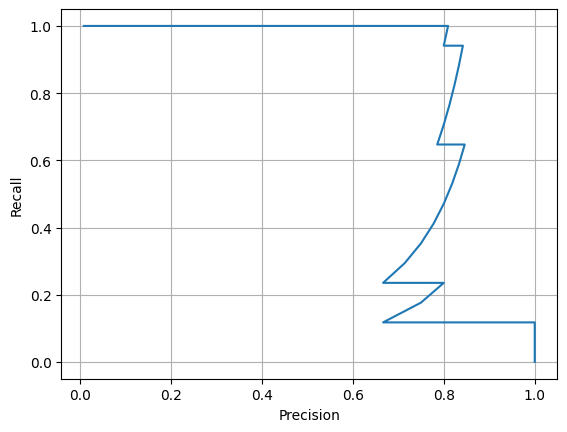

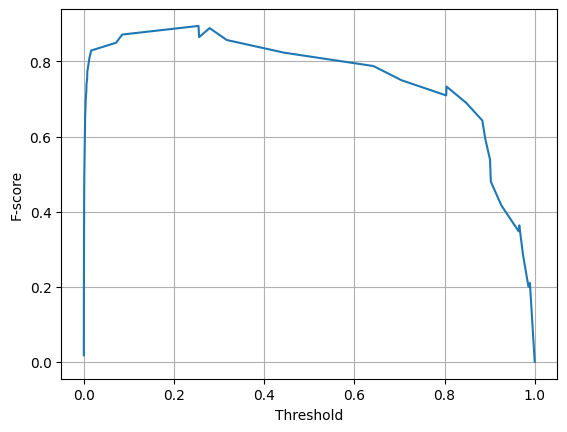

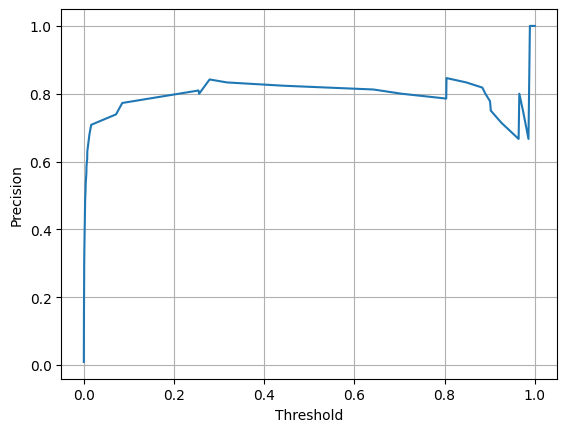

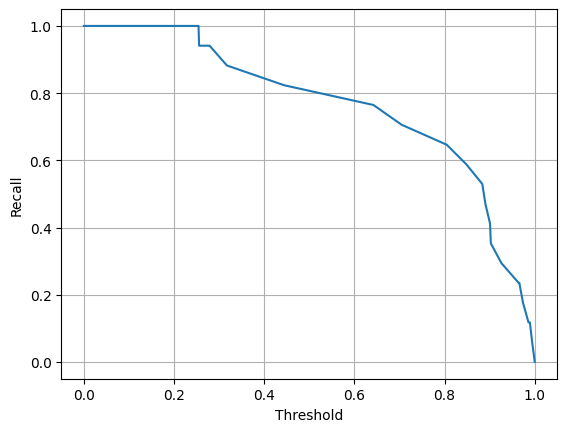

In [7]:
analyse_thresholds('sex')

Величина порога $t$ выбирается таким образом, чтобы достигалось максимальное значение величины $F(t)$, т.е., $t = 0.25$.

# Limit

C:\Users\andre\PycharmProjects\AdClassificationProject\venv\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
C:\Users\andre\PycharmProjects\AdClassificationProject\src\models\models_utils.py:572: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probas[pred_prob_label] = F.softmax(pred_probas[pred_prob_label]).\


t = 0.42462095618247986


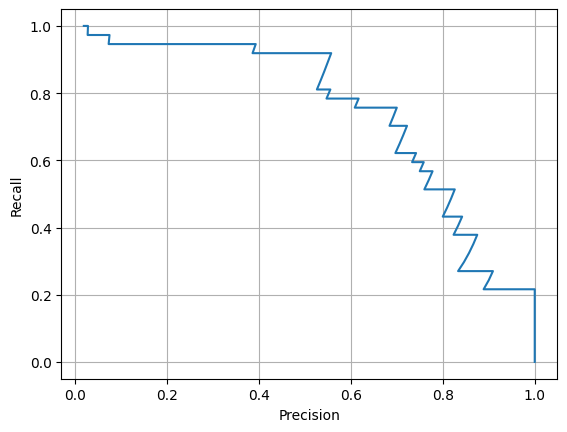

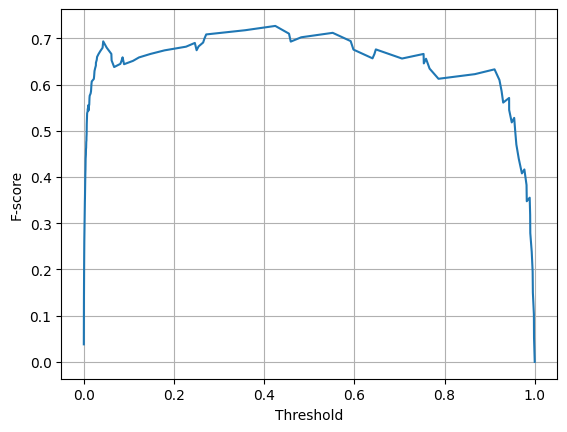

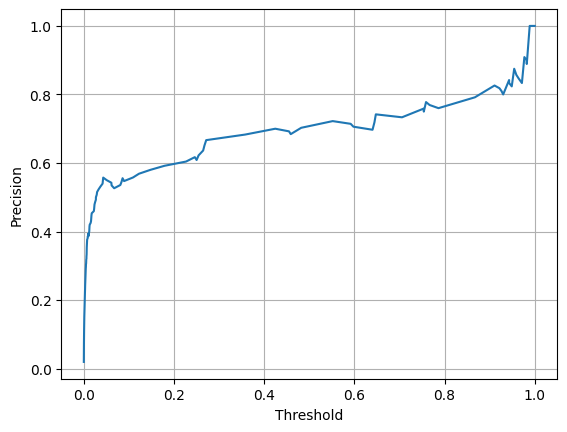

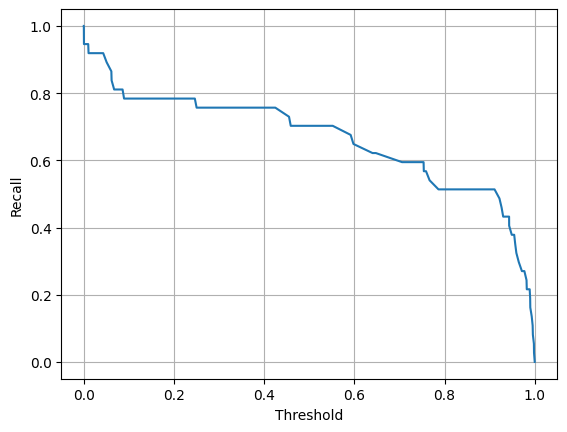

In [6]:
analyse_thresholds('limit')

Величина порога $t$ выбирается таким образом, чтобы достигалось максимальное значение величины $F(t)$, т.е., $t = 0.42$.